In [63]:
import warnings
import pandas as pd
import scanpy as sc
import numpy as np
import scrublet as scr
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad

# Process adata object

In [64]:
adata = sc.read_h5ad("/data/class/cosmos2023/PUBLIC/terminator/scanpy/adata.h5ad")

In [65]:
#sc.pp.filter_cells(adata, min_genes=300)
#sc.pp.filter_genes(adata, min_cells=3)


In [66]:
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)


/opt/apps/python/3.8.0/lib/python3.8/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


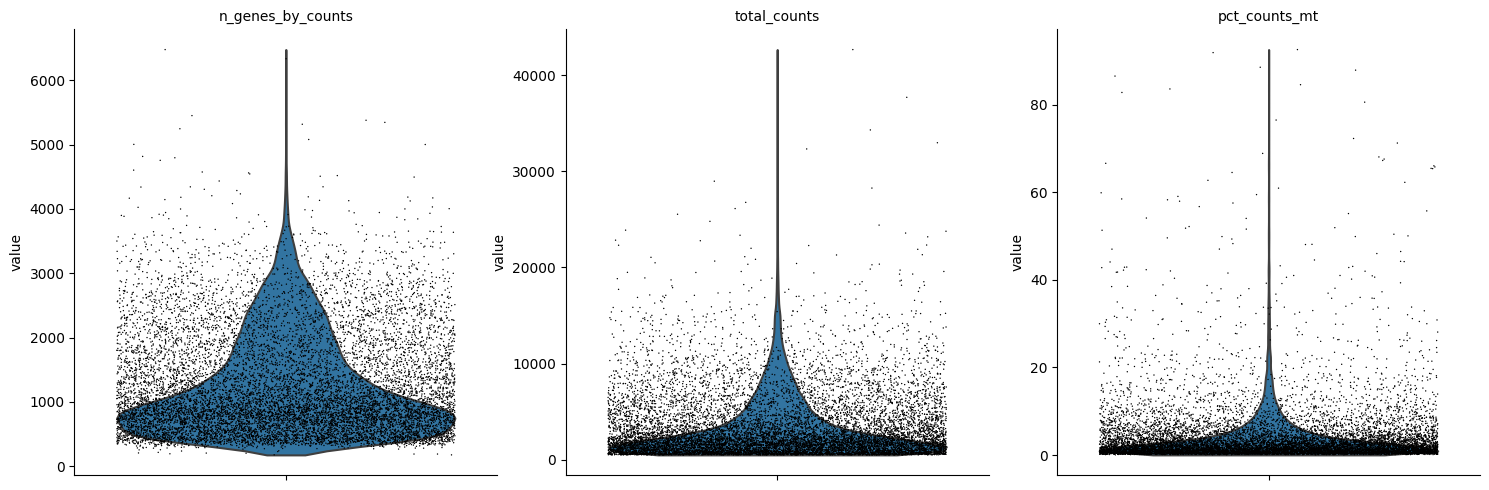

In [67]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

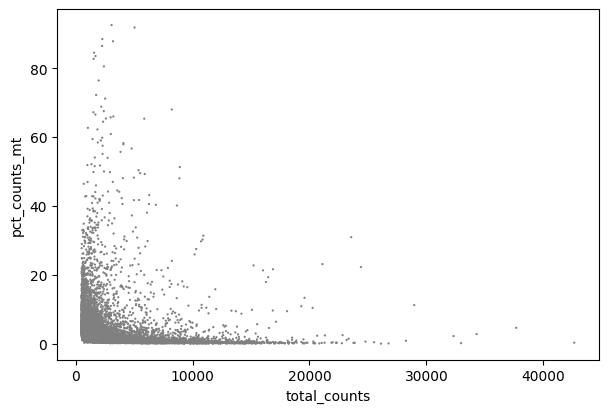

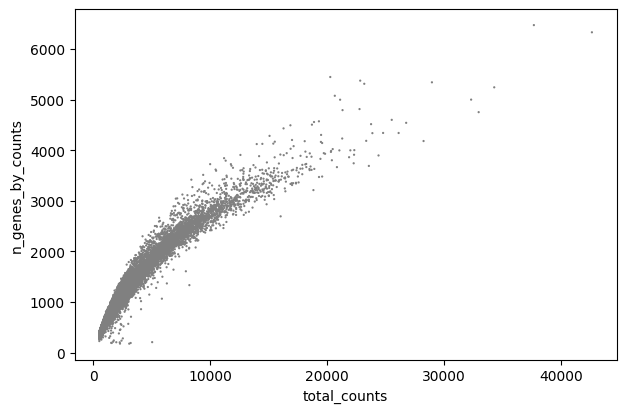

In [68]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [69]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 10, :]

In [70]:
sc.pp.normalize_total(adata, target_sum=1e4)

/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [71]:
sc.pp.log1p(adata)

In [72]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [73]:
adata.raw = adata

In [74]:
adata = adata[:, adata.var.highly_variable]

In [75]:
adata

View of AnnData object with n_obs × n_vars = 9563 × 3829
    obs: 'raw_bc', 'bc', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [76]:
sc.tl.pca(adata, svd_solver='arpack')

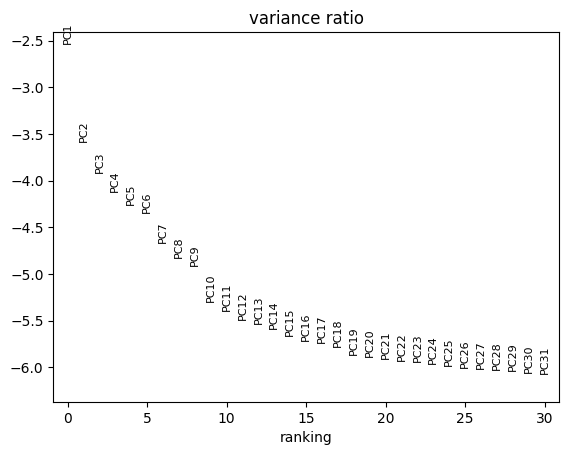

In [77]:
sc.pl.pca_variance_ratio(adata, log=True)

In [78]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)

In [79]:
sc.tl.umap(adata)

In [80]:
sc.tl.leiden(adata)

/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


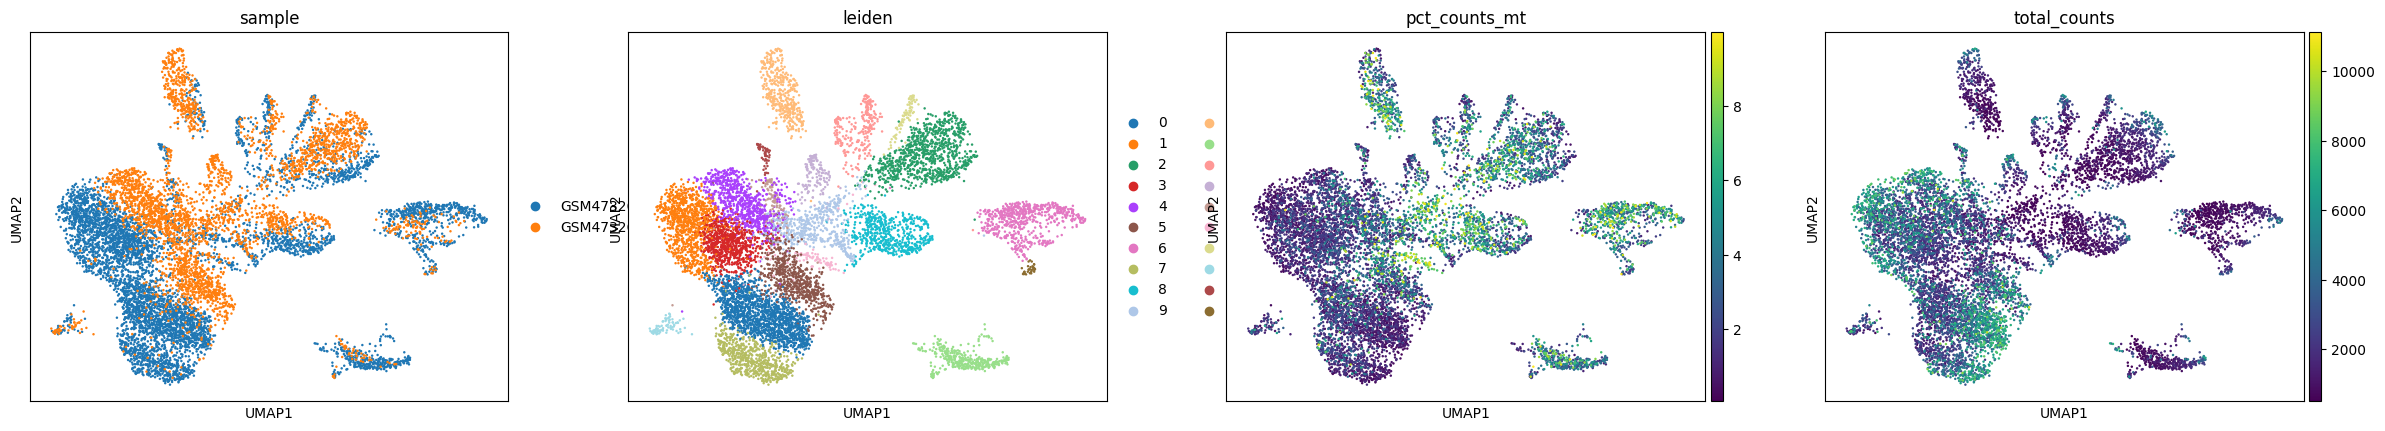

In [81]:
sc.pl.umap(adata, color=['sample','leiden', 'pct_counts_mt', 'total_counts'])

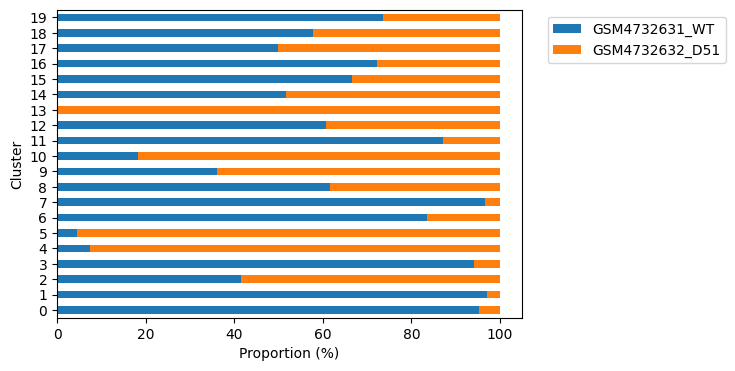

In [82]:
category_proportions = pd.crosstab(adata.obs['leiden'], adata.obs['sample']).apply(lambda x: x / x.sum(), axis=1) * 100

# Plot the bar plot
ax = category_proportions.plot(kind='barh', stacked=True)

# Add labels
plt.xlabel('Proportion (%)')
plt.ylabel('Cluster')


# Move the legend outside the plot
ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left')

# Set the desired width and height in inches
width = 6
height = 4
fig = plt.gcf()
fig.set_size_inches(width, height)

# Save the plot as a PNG file with high quality
output_file = 'tissue_barplot.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


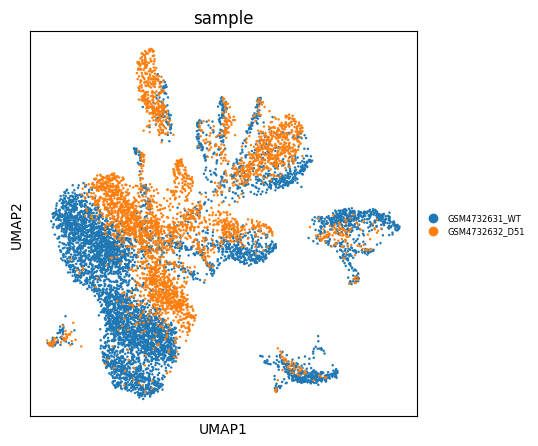

In [83]:
# by sample
umap = sc.pl.umap(adata, color=['sample'],show=False,legend_fontsize=6, frameon=True, title='sample')

fig = umap.get_figure()
fig.set_size_inches(5, 5)
fig.savefig('sample_umap', dpi=400, bbox_inches='tight')


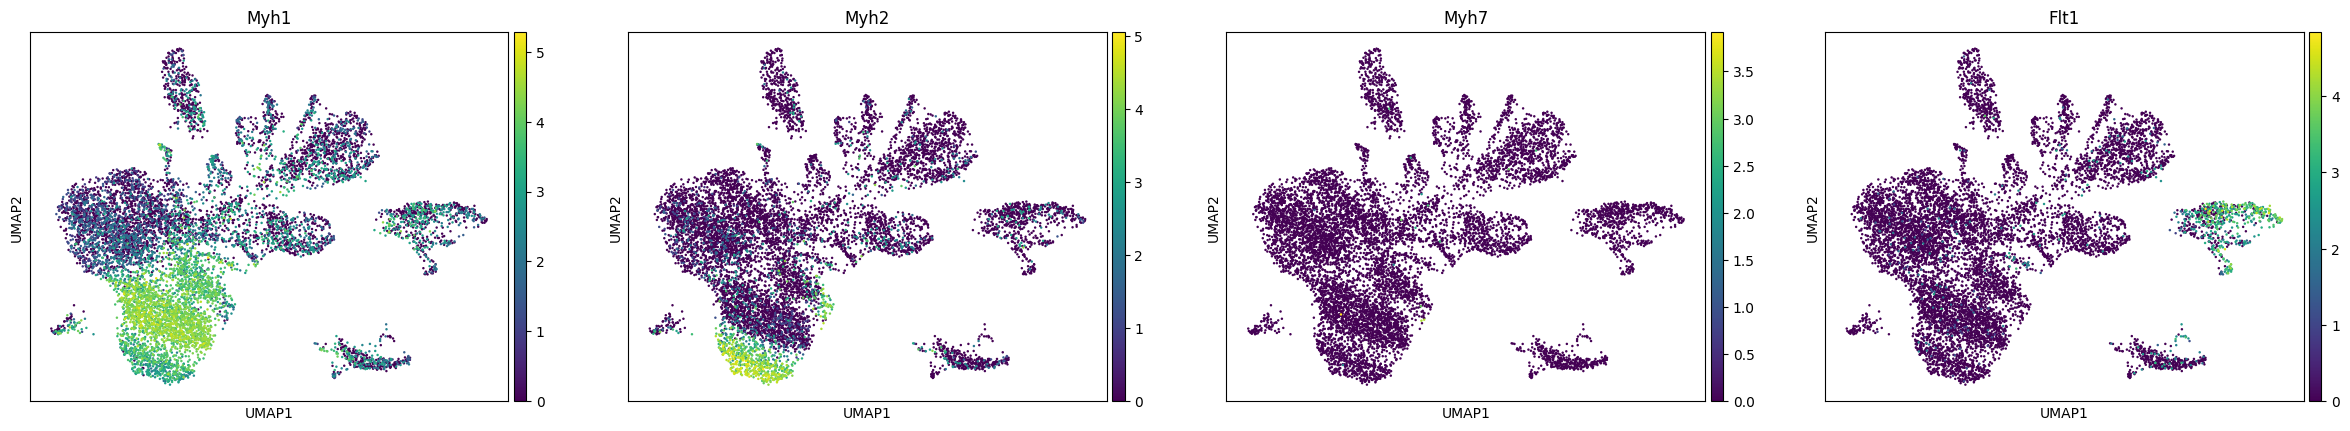

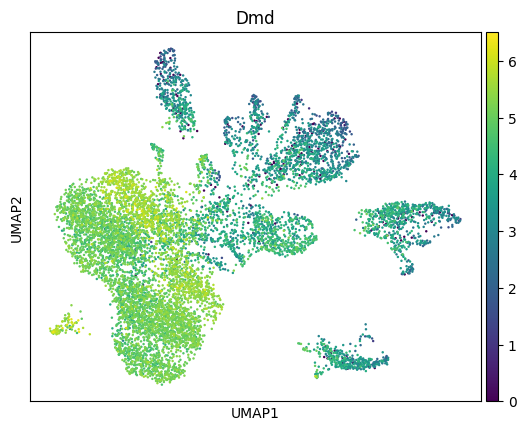

In [84]:
sc.pl.umap(adata, color=['Myh1','Myh2', 'Myh7','Flt1' ])


sc.pl.umap(adata, color=['Dmd'])

# Try subsetting for a specific cluster

In [85]:
data_subset = adata[adata.obs['leiden'].isin(['0'])]


In [86]:
data_subset

View of AnnData object with n_obs × n_vars = 1531 × 3829
    obs: 'raw_bc', 'bc', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'sample_colors', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

# Try subclustering without subsetting

In [87]:
sc.tl.leiden(adata, restrict_to=('leiden', ['0']), resolution=0.5, key_added='leiden_subcluster')


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


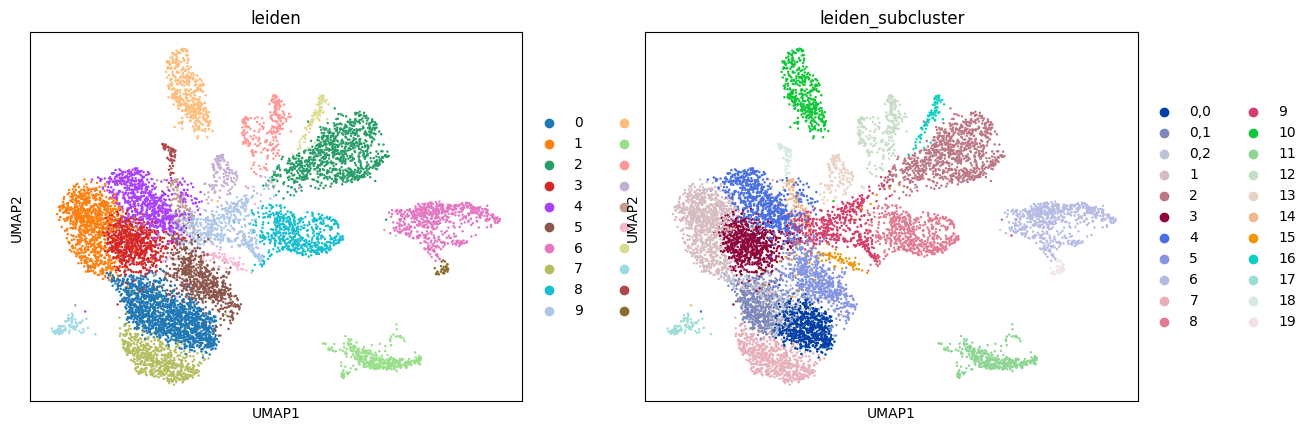

In [88]:
sc.pl.umap(adata, color=['leiden','leiden_subcluster'])

In [90]:
adata.write_h5ad("/data/class/cosmos2023/PUBLIC/terminator/scanpy/adata_processed.h5ad")


# Heatmap of celltype markers

In [91]:
markers = pd.read_csv("/data/class/cosmos2023/PUBLIC/ref/IGVF_curated_markers.csv")
markers = markers[markers['Tissue'] == 'Gastrocnemius']

genes = markers['Gene']
genes = genes.unique()

marker_genes = [x for x in genes if x in adata.var_names]
myogeneis_genes = ['Myog','Myod1','Myf5','Myf6','Pax7','Myh3']

marker_genes = marker_genes + myogeneis_genes

/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


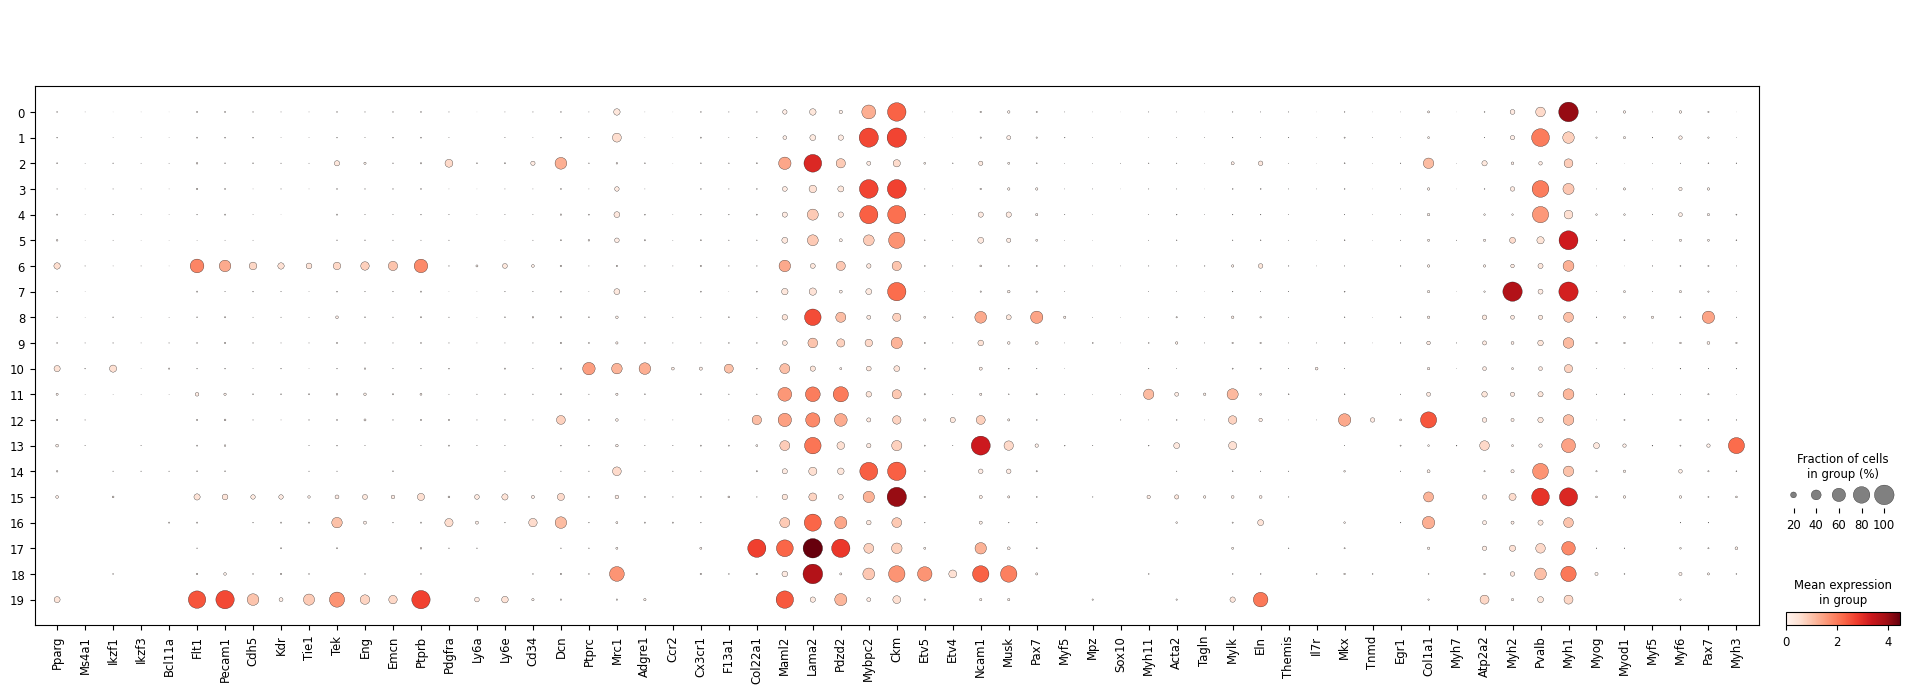

In [92]:
sc.pl.dotplot(adata, marker_genes, groupby='leiden');


# Heatmap of cluster markers

In [94]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


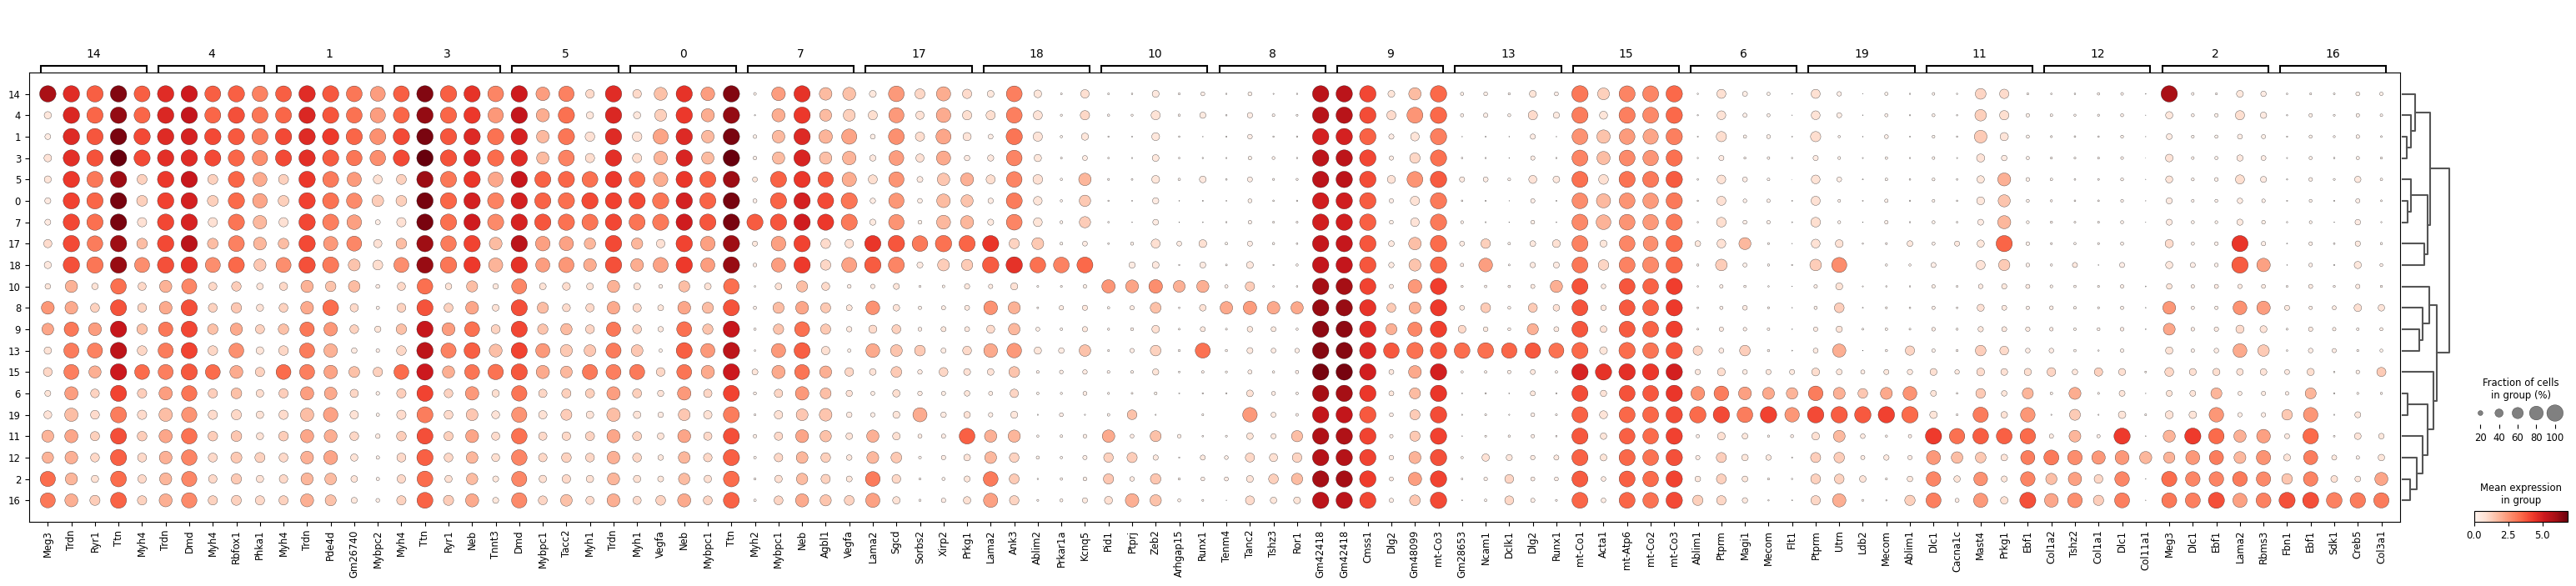

In [95]:
import scanpy as sc
import matplotlib.pyplot as plt

# Assuming your AnnData object is called 'adata'
sc.pl.rank_genes_groups_dotplot(adata, n_genes = 5, save='rank_genes_dotplot.png')


# Use paper marker genes

/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


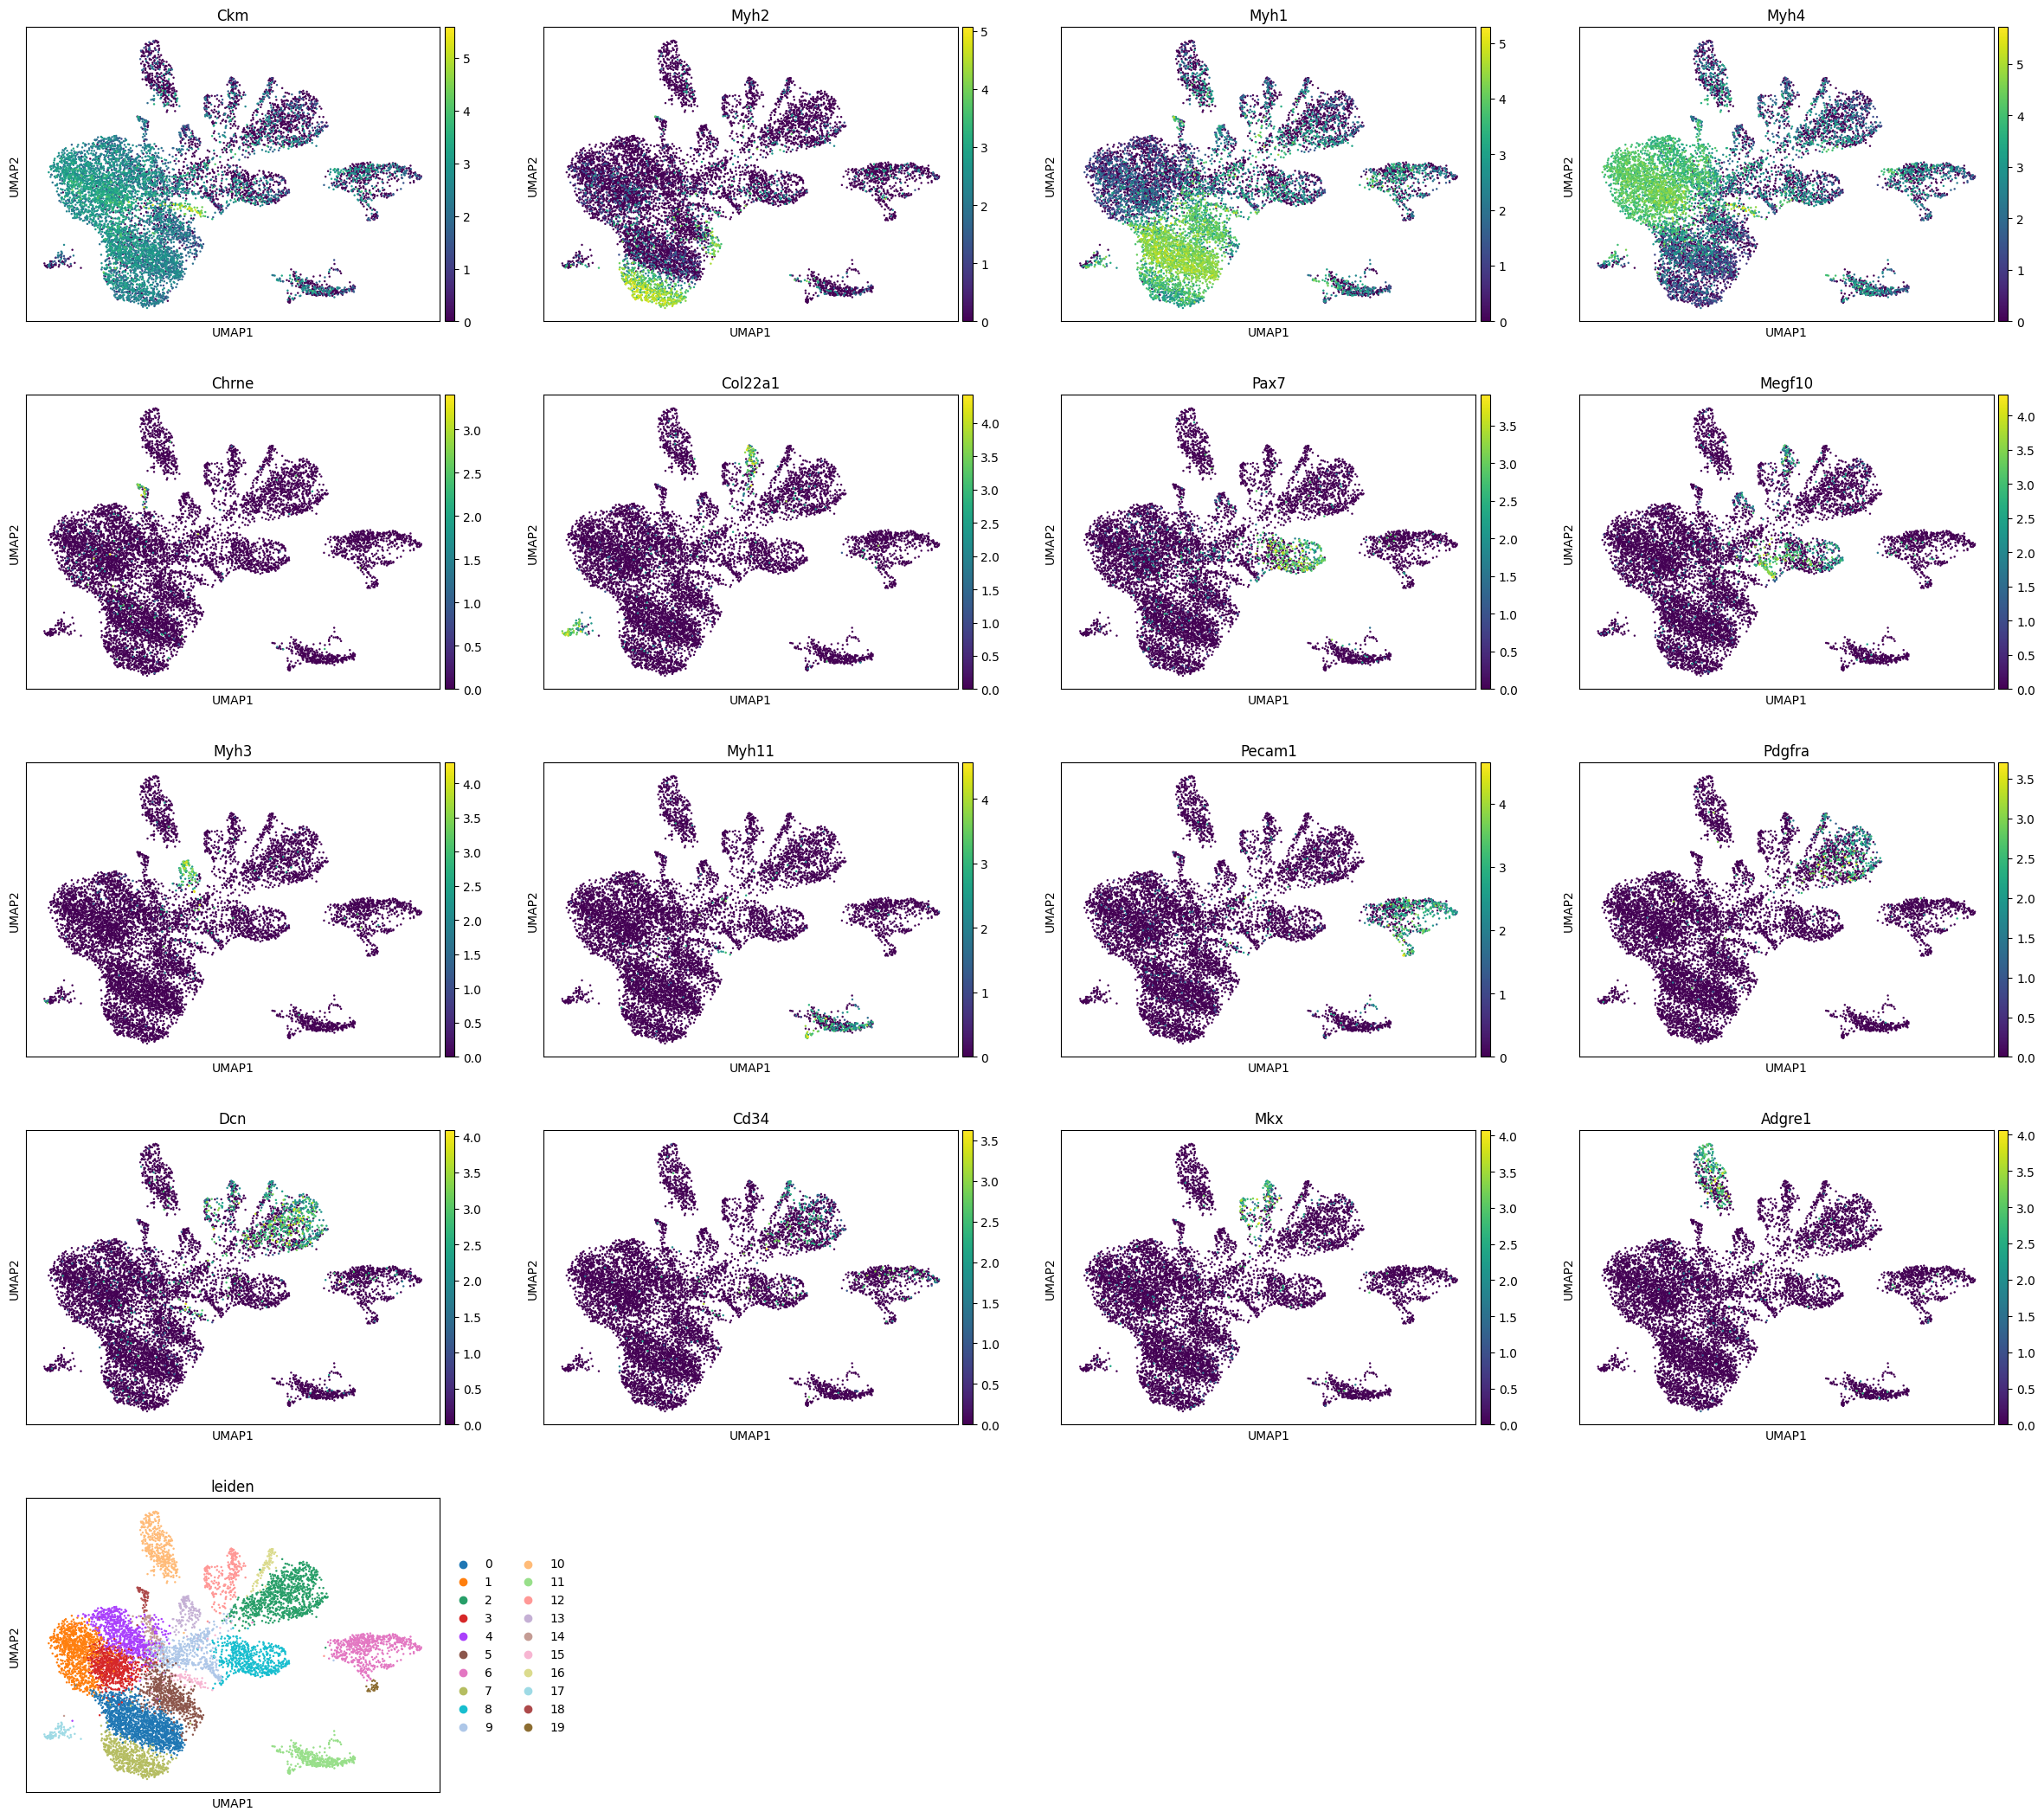

In [98]:
sc.pl.umap(adata, color=['Ckm','Myh2', 'Myh1','Myh4', 
                        'Chrne','Col22a1','Pax7','Megf10',
                         'Myh3','Myh11','Pecam1','Pdgfra','Dcn','Cd34',
                         'Mkx','Adgre1','leiden'])


/opt/apps/python/3.8.0/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


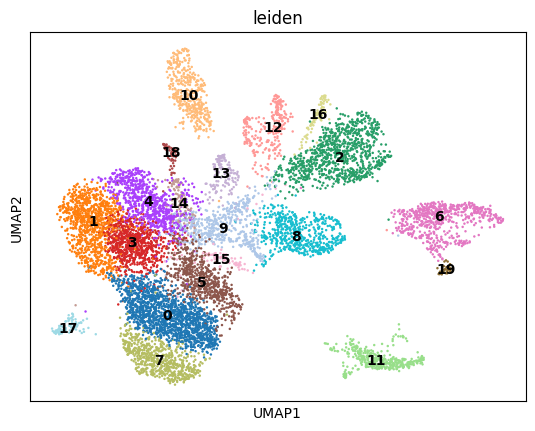

In [99]:
sc.pl.umap(adata, color=['leiden'], legend_loc="on data" )



# Annotate

In [ ]:
# Assuming you have a dictionary that maps clusters to cell types called 'cluster_to_celltype'
cluster_to_celltype = {
    '0': '',
    '1': '',
    '2': 'FAP',
    '3': '',
    '4': '',
    '5': '',
    '6': 'Endothelial',
    '7': '',
    '8': '',
    '9': '',
    '10': 'Macrophage',
    '11': 'Smooth muscle',
    '12': 'Tenocyte',
    '13': '',
    '14': '',
    '15': '',
    '16': '',
    '17': '',
    '18': '',
    '19': 'Endothelial'

}

# Create a new column 'celltype' based on 'leiden' with renamed clusters
adata.obs['celltype'] = adata.obs['leiden'].map(cluster_to_celltype)


